# 中文文集的情緒分析2

# 第1次讀書會：對ptt車、汽車買賣版「電動車」進行情緒分析
**組別:** 第二組<br>
**組員:** 李昌澤、林咨妤、毛天楷、林冠杰、劉捷生、張家馨、蔡尚宸<br>

## 大綱
1. 套件說明
2. CKIP 介紹
    + 2.1 安裝CKIP
    + 2.2 利用CKIP進行自然語言處理
3. CKIP 標註
    + 3.1 將抓取結果用CKIP進行處理
    + 3.2 探索分析 - NER
    + 3.3 探索分析 - POS
4. 利用SnowNLP進行情緒分析

## 1. 套件說明
下面列出在本次實作過程中我們所使用到的相關套件，在這個Jupyter Notebook當中我們將會簡單的展示這些套件的使用方式，關於各個套件的進階使用請同學參照其官網的說明。
- pandas: 一個資料分析的函式庫，提供了DataFrame等資料格式，與資料處理的函數。
- CKIP: 全名為Chinese Knowledge and Information Processing，中研院開發的中文自然語言處理工具。
- wordcloud: 文字雲繪圖工具。
- matplotlib: 繪圖工具。
- SnowNLP: SnowNLP是一個可以方便的處理中文文本內容的python類庫，是受到了TextBlob的啟發而寫的。SnowNLP主要功能包括斷詞、詞性標註、情緒分析、漢字轉拼音、繁體轉簡體、關鍵詞提取以及文本摘要等等。

In [8]:
from ckiptagger import data_utils, construct_dictionary, WS, POS, NER
import re
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
import time
import datetime

如果有重新裝package，記得需要restart kernel 才會使用更新後的套件

## 2. CKIP 介紹
- 是中研院詞庫小組開發的中文自然語言處理套件，其斷詞效果比起`jieba`效果更好，並且提供性命名實體辨識、詞性標註、句法分析
- github: https://github.com/ckiplab/ckiptagger

### 2.1 CKIP安裝

In [ ]:
data_utils.download_data_gdown("./")  # 下載ckip model

### 2.2 利用CKIP進行自然語言處理
透過ckip這個套件可以對文集進行斷詞、命名實體辨識、詞性標記等處理
+ CKIP 標註任務
    + 斷詞（ws）
        + 可以設定自己的辭典
            + `recommend_dictionary` 推薦字典
            + `coerce_dictionary` 強制字典
    + 實體辨識（ner）
    + 詞性標註（pos）
+ NER與POS名詞對應: https://ckip.iis.sinica.edu.tw/service/corenlp/ （左上角的標記列表）

In [9]:
# 將三份工具的模型路徑指向我們剛才下載的檔案「data」
ws = WS("./data")
pos = POS("./data")
ner = NER("./data")

C:\Users\meiii\AppData\Roaming\Python\Python311\site-packages\ckiptagger\model_ws.py:106: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell = tf.compat.v1.nn.rnn_cell.LSTMCell(hidden_d, name=name)
C:\Users\meiii\AppData\Roaming\Python\Python311\site-packages\ckiptagger\model_pos.py:56: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell = tf.compat.v1.nn.rnn_cell.LSTMCell(hidden_d, name=name)
C:\Users\meiii\AppData\Roaming\Python\Python311\site-packages\ckiptagger\model_ner.py:57: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell =

## 3. CKIP 標註

### 3.1 將抓取結果用CKIP進行處理
資料來源：
+ 工作流程平台蒐集PTT CarShop、車版文章
+ 關鍵字:「電動車」(3084筆)
+ 時間: 2021-03-17 ~ 2024-03-17


In [10]:
## 讀取文章
df = pd.read_csv('sna2024s_2.csv')
df.head(3)

,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artContent,artComment,e_ip,insertedDate,dataSource
0,1,https://www.ptt.cc/bbs/car/M.1615949849.A.BFB....,Re:[新聞]污染環節在製造，電動車遠非零碳排,2021-03-17 10:57:27,gk1329,car,其實大約10多年前\n就有車廠在研發\n100%酒精燃料車\nhttps://speed.e...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""bitlife"", ""c...",27.52.63.103,2021-03-18 00:08:39,ptt
1,2,https://www.ptt.cc/bbs/car/M.1615981917.A.9BC....,[新聞]零到一百只要4秒鐘 BMWi4電動跑房,2021-03-17 19:51:55,FAPP,car,零到一百只要 4 秒鐘 BMW i4 電動跑房車正式亮相\n\n原文連結：\nhttps:/...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""losel"", ""cmt...",223.137.161.102,2021-03-18 00:08:43,ptt
2,3,https://www.ptt.cc/bbs/car/M.1616040308.A.BC2....,[新聞]70萬元的特斯拉還不夠便宜？大摩分析師,2021-03-18 12:05:05,hiphoprover,car,原文連結：\nhttps://bit.ly/2QcM2yx\n原文內容：\n\n70 萬元的...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""RYO711118"", ...",123.192.45.66,2021-03-20 00:12:19,ptt


定義文字清理的相關function

In [17]:
def Segmentation_Core(data, tokenizer):
    # 將所有的斷行字元配上 escape 以防失效
    regexPattern = '|'.join(map(re.escape, tokenizer))
    output_list = re.split(regexPattern, data)
    # 過濾空白行
    output_list = list(filter(None, output_list))
    return output_list

def Sentence_Segmentation(article, keep_digits=False, keep_alphabets=False):
    """ Sentence_Segmentation function 用於執行中文斷行任務

    順序如下：
    1. 去除(\\n)
    2. 去除特殊符號字元
    3. 保留數字
    4. 依照斷句字元進行斷句全形的分號、逗號、句號、問號以及驚嘆號
    5. 避免空白斷句結果

    Args:
        article(string): 欲斷行之文章內容
        keep_digits(Boolean): 決定是否保留數字於斷行後的結果
        keep_alphabets(Boolean): 決定是否保留字母於斷行後的結果
    Returns:
        List [] 每個 element 就是一行
    """
    sepical_symbols = r'[.＂<>:《》+\-=#$%&()*@＃＄％＆＇\(\)\[\]\{\}（）＊＋－／：\
    ＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—一‘’‛“”„‟…‧﹏★→─]+'
    segmentation_used_note = (";", "；", "！", "!", "？", "?", "。")
    

    paragraphs = list(filter(lambda x: re.sub(r'\s+','', x), article.split("\n")))
    # print(len(paragraphs))
    # print(paragraphs)
    
    result = []
    for paragraph in paragraphs:

        clean_paragraph = paragraph
        try:
            url_pattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
            clean_paragraph = re.sub(url_pattern,'', clean_paragraph)
            
            if not keep_digits:
                clean_paragraph = re.sub(r'\d*\.?\d+','', clean_paragraph) #remove space & digits
            if not keep_alphabets:
                clean_paragraph = re.sub('[a-zA-Z]+', '', clean_paragraph)
            
            clean_paragraph = re.sub(r'[\s]+','', clean_paragraph) #remove space
            
            clean_paragraph = re.sub(sepical_symbols,'',clean_paragraph)
            
        except:
            return "error"
        
        res = Segmentation_Core(clean_paragraph, segmentation_used_note)
        result.append(res)
    
    return result


CKIP 處理相關function

In [18]:
def get_pos(post_id, word_sentence, pos_sentence):
    tokens = []
    # print("\nPOS: ", end="\u3000")
    assert len(word_sentence) == len(pos_sentence)
    for word, pos in zip(word_sentence, pos_sentence): # token level
        tokens.append([post_id, word, pos]) 
    # print(f"{word}({pos})", end="\u3000")
    return tokens

def get_ner(post_id, entity_sentence):
    entities = []
    # print("\nNER:___________ ")
    for entity in sorted(entity_sentence): # token level
        entities.append([post_id, entity[3], entity[2]]) 
    return entities

def get_nlp_result(data_df):
    start = time.time()

    pos_list = []
    entity_list = []
    sentence_list = []
    
    # 遍歷 dataframe 的每筆資料
    for index, row in data_df.iterrows(): # document level    
    # print(f"\ndocument {index}") 

        # 資料清理 ＆ 斷句
        tmp = Sentence_Segmentation(row['artContent']) 
        flat_list = [item for sublist in tmp for item in sublist]

        # ckip
        word_sentence_list = ws(flat_list)
        pos_sentence_list = pos(word_sentence_list)
        entity_sentence_list = ner(word_sentence_list, pos_sentence_list)

        # 遍歷該 document 中的每一個句子
        for i, sentence in enumerate(flat_list):
            # print(f"sentence {i}: {sentence}")
            sentence_list.append([row['system_id'], sentence])            
            temp_tokens = get_pos(row['system_id'], word_sentence_list[i], pos_sentence_list[i])
            temp_entites = get_ner(row['system_id'], entity_sentence_list[i])

            pos_list.append(temp_tokens)
            if len(temp_entites) != 0:
                entity_list.append(temp_entites)
            
    pos_flat = [item for sublist in pos_list for item in sublist]
    entity_flat = [item for sublist in entity_list for item in sublist]

    pos_table = pd.DataFrame(data=pos_flat, 
                    columns=['system_id','word','pos'])        
    
    entity_table = pd.DataFrame(data=entity_flat, 
                        columns=['system_id','word','ner']) 

    sentence_table = pd.DataFrame(data=sentence_list, 
                    columns=['system_id','sentence']) 

    end = time.time()
    print("time costing: {}".format(end - start))

    return pos_table, entity_table, sentence_table

In [19]:
# 看看 tmp 和 flat_list 有什麼差別
tmp = Sentence_Segmentation(df['artContent'][0]) 
flat_list = [item for sublist in tmp for item in sublist]
print(tmp[:5])
print(flat_list[:5])

[['其實大約多年前'], ['就有車廠在研發'], ['酒精燃料車'], [], ['如果用生質酒精當燃料']]
['其實大約多年前', '就有車廠在研發', '酒精燃料車', '如果用生質酒精當燃料', '就是']


In [20]:
pos_table, entity_table, sentence_table = get_nlp_result(df)

time costing: 2318.551548719406


+ 欄位名稱介紹
    + pos_table 欄位:
        + system_id : ptt 貼文id
        + word: 原始斷詞
        + pos : part-of-speech,詞性
    + entity_table 欄位:
        + system_id : ptt 貼文id
        + word: 原始斷詞
        + ner: 命名實體
    + sentence_table 欄位:
        + system_id : ptt 貼文id
        + text: 原始斷句

In [21]:
pos_table.head() # word pos 列表

,system_id,word,pos
0,1,其實,D
1,1,大約,Da
2,1,多,Neqa
3,1,年,Nf
4,1,前,Ng


In [22]:
entity_table.head() # word entity 列表

,system_id,word,ner
0,1,多年前,DATE
1,1,夜間,TIME
2,2,今年,DATE
3,2,四,CARDINAL
4,2,年底前,DATE


In [23]:
sentence_table.head()

,system_id,sentence
0,1,其實大約多年前
1,1,就有車廠在研發
2,1,酒精燃料車
3,1,如果用生質酒精當燃料
4,1,就是


In [24]:
# 檢查筆數
print(f"total posts numbers: {len(pos_table['system_id'].unique())}") # 1628篇文
print(f"posts have NER: {len(entity_table['system_id'].unique())}") # 1620篇有抓到ner

total posts numbers: 3083
posts have NER: 2880


In [25]:
# 將文章存成csv
pos_table.to_csv('pos_table_buffet.csv', index = False)
entity_table.to_csv('entity_table_buffet.csv', index = False)
sentence_table.to_csv('sentence_table_buffet.csv', index = False)

### 3.2 探索分析 - NER

將剛才分析的資料匯入

In [26]:
# 讀取已經執行完畢的結果
pos_table = pd.read_csv("pos_table_buffet.csv") 
entity_table = pd.read_csv("entity_table_buffet.csv") 
sentence_table = pd.read_csv("sentence_table_buffet.csv") 

### NER 種類分析
查看標註這個文集後辨識出哪一些實體種類<br>
名詞對應: https://ckip.iis.sinica.edu.tw/service/corenlp/ （左上角的標記列表）

In [27]:
entity_table['ner'].unique()

array(['DATE', 'TIME', 'CARDINAL', 'ORDINAL', 'QUANTITY', 'MONEY', 'ORG',
       'PERSON', 'PRODUCT', 'GPE', 'LOC', 'NORP', 'FAC', 'LANGUAGE',
       'PERCENT', 'LAW', 'WORK_OF_ART', 'EVENT'], dtype=object)

In [28]:
ner_count = entity_table.groupby(['ner'])['ner'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(10)
ner_count

,ner,count
11,ORG,12188
4,GPE,11205
1,DATE,6881
0,CARDINAL,4754
13,PERSON,4244
7,LOC,1731
8,MONEY,1683
10,ORDINAL,1383
9,NORP,1146
14,PRODUCT,1111


C:\Users\meiii\AppData\Local\Temp\ipykernel_328\3390866936.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


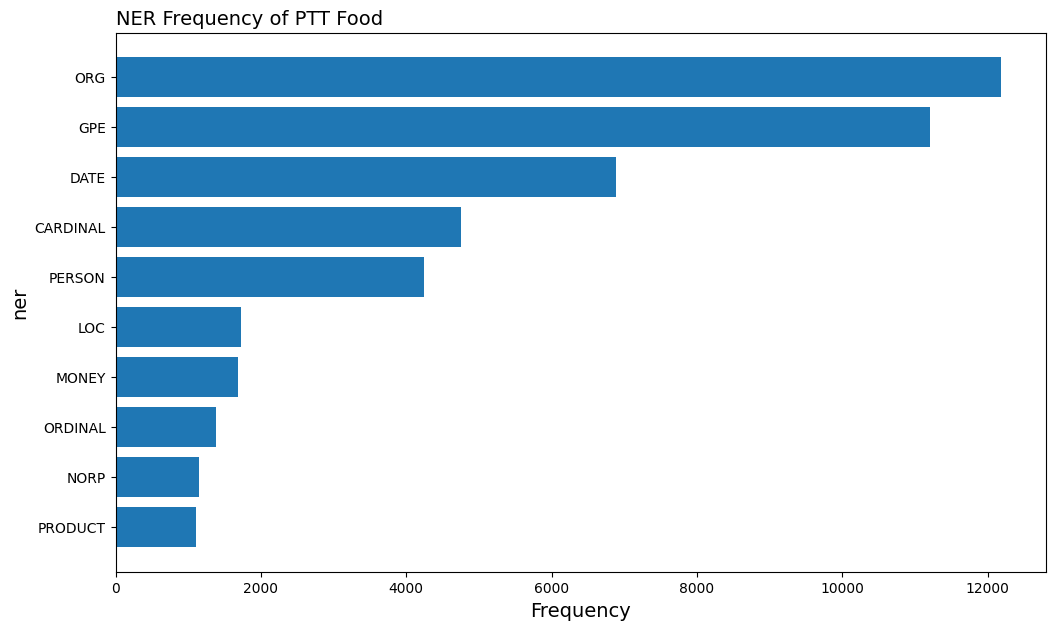

In [29]:
ner = ner_count['ner']
count = ner_count['count']

fig, ax = plt.subplots(figsize =(12, 7))
ax.barh(ner, count)
ax.invert_yaxis()
ax.set_title('NER Frequency of PTT Food',loc ='left', size = 14)
ax.set_ylabel('ner', size = 14)
ax.set_xlabel('Frequency', size = 14)
fig.show()

### 涉及到的民族、宗教、政治團體(NORP)

C:\Users\meiii\AppData\Local\Temp\ipykernel_328\3898539887.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


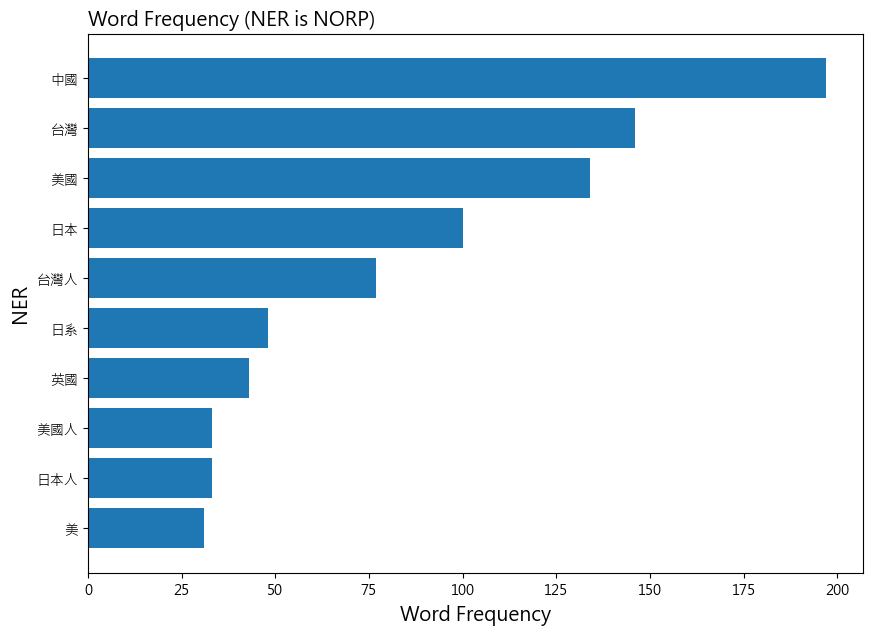

In [30]:
# 篩選ner為NORP的資料
l_noun = ["NORP"]
NORP = entity_table[entity_table.ner.isin(l_noun)]

# # 計算每個名詞提到的次數，選出前10個
ner_count = NORP.groupby('word')['word'].agg(['count'])
ner_count = ner_count.sort_values(['count'],ascending=False)['count'].nlargest(10).reset_index()
ner_count

# 設定中文字形
plt.rcParams['font.family'] = 'Microsoft JhengHei'
plt.rcParams['axes.unicode_minus'] = False
word = ner_count['word']
count = ner_count['count']

fig, ax = plt.subplots(figsize =(10, 7))
ax.barh(word, count)
ax.invert_yaxis()
ax.set_title('Word Frequency (NER is NORP)',loc ='left', size = 14)
ax.set_ylabel('NER', size = 14)
ax.set_xlabel('Word Frequency', size = 14)
fig.show()

可以看到台灣人在討論電動車時，大多圍繞在「中國」、「日本」等汽車製造國

### 涉及到的組織(ORG)

C:\Users\meiii\AppData\Local\Temp\ipykernel_328\3449367532.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


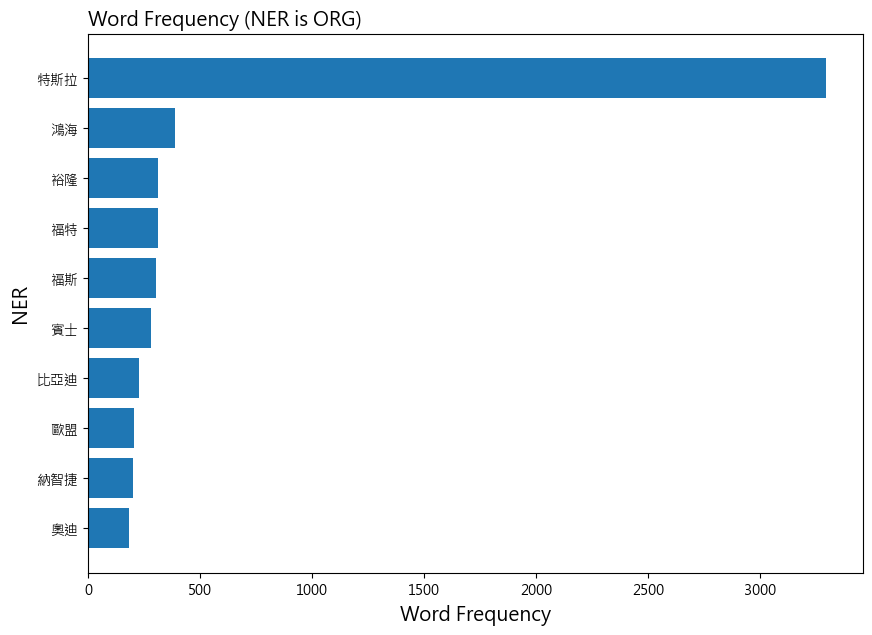

In [31]:
# 篩選ner為ORG的資料
l_noun = ["ORG"]
ORG = entity_table[entity_table.ner.isin(l_noun)]

# # 計算每個名詞提到的次數，選出前10個
ner_count = ORG.groupby('word')['word'].agg(['count'])
ner_count = ner_count.sort_values(['count'],ascending=False)['count'].nlargest(10).reset_index()
ner_count

# 設定中文字形
plt.rcParams['font.family'] = 'Microsoft JhengHei'
plt.rcParams['axes.unicode_minus'] = False
word = ner_count['word']
count = ner_count['count']

fig, ax = plt.subplots(figsize =(10, 7))
ax.barh(word, count)
ax.invert_yaxis()
ax.set_title('Word Frequency (NER is ORG)',loc ='left', size = 14)
ax.set_ylabel('NER', size = 14)
ax.set_xlabel('Word Frequency', size = 14)
fig.show()

可以看到在多數的電動車評論文章之中，「特斯拉」是多數文章會討論到的品牌，也間接反映出讀者在選購時對於電動車品牌的關注。

### 涉及到的人名(PERSON)

C:\Users\meiii\AppData\Local\Temp\ipykernel_328\2335522544.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


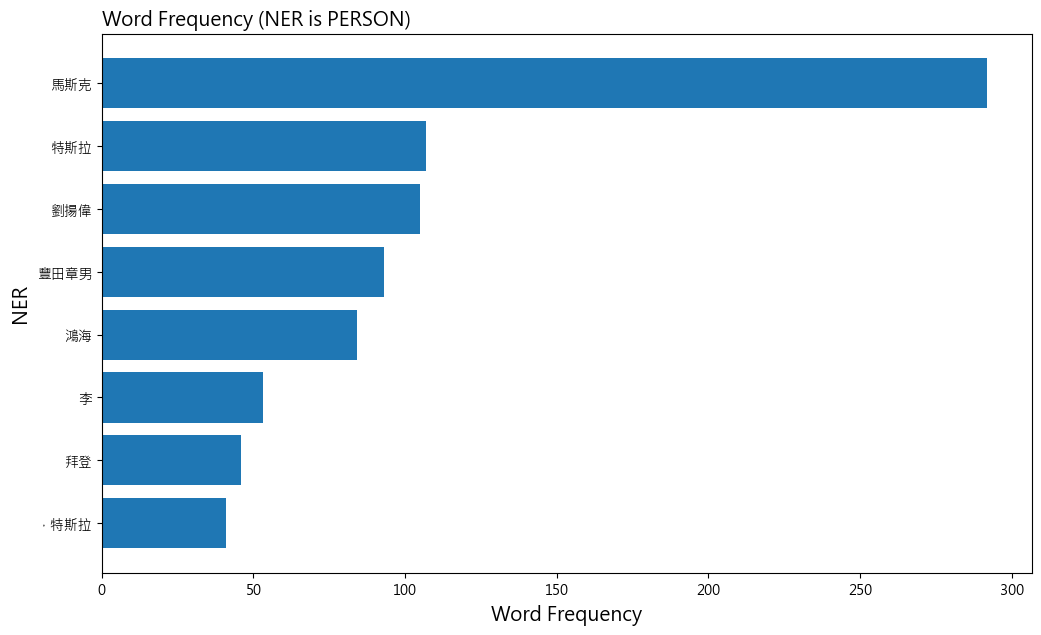

In [32]:
# 篩選ner為PERSON的資料
l_noun = ["PERSON"]
PERSON = entity_table[entity_table.ner.isin(l_noun)]

# 計算每個名詞提到的次數，選出前8個
ner_count = PERSON.groupby('word')['word'].agg(['count'])
ner_count = ner_count.sort_values(['count'],ascending=False)['count'].nlargest(8).reset_index()

# 設定中文字形
plt.rcParams['font.family'] = 'Microsoft JhengHei'
plt.rcParams['axes.unicode_minus'] = False
word = ner_count['word']
count = ner_count['count']

fig, ax = plt.subplots(figsize =(12, 7))
ax.barh(word, count)
ax.invert_yaxis()
ax.set_title('Word Frequency (NER is PERSON)',loc ='left', size = 14)
ax.set_ylabel('NER', size = 14)
ax.set_xlabel('Word Frequency', size = 14)
fig.show()

在上方涉及到人名的NER中，可以看到馬斯克、特斯拉、劉揚偉(鴻海董事長)被談及到的次數眾多，可以聯想到鴻海近期積極地在開發電動車，因此引起一番討論。
下面找出「電動車」相關文章，與後續情緒分析一起做探索

In [33]:
keyword_list = ['電動車','特斯拉','馬斯克','劉揚偉']
shu_selected = df[df['artContent'].str.contains('|'.join(keyword_list),regex=True)]
print(f"{' '.join(keyword_list)}：{shu_selected.shape[0]}篇相關貼文")
shu_selected.head(3)

電動車 特斯拉 馬斯克 劉揚偉：2840篇相關貼文


,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artContent,artComment,e_ip,insertedDate,dataSource
0,1,https://www.ptt.cc/bbs/car/M.1615949849.A.BFB....,Re:[新聞]污染環節在製造，電動車遠非零碳排,2021-03-17 10:57:27,gk1329,car,其實大約10多年前\n就有車廠在研發\n100%酒精燃料車\nhttps://speed.e...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""bitlife"", ""c...",27.52.63.103,2021-03-18 00:08:39,ptt
1,2,https://www.ptt.cc/bbs/car/M.1615981917.A.9BC....,[新聞]零到一百只要4秒鐘 BMWi4電動跑房,2021-03-17 19:51:55,FAPP,car,零到一百只要 4 秒鐘 BMW i4 電動跑房車正式亮相\n\n原文連結：\nhttps:/...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""losel"", ""cmt...",223.137.161.102,2021-03-18 00:08:43,ptt
2,3,https://www.ptt.cc/bbs/car/M.1616040308.A.BC2....,[新聞]70萬元的特斯拉還不夠便宜？大摩分析師,2021-03-18 12:05:05,hiphoprover,car,原文連結：\nhttps://bit.ly/2QcM2yx\n原文內容：\n\n70 萬元的...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""RYO711118"", ...",123.192.45.66,2021-03-20 00:12:19,ptt


### 3.3 探索分析 - POS

#### POS 種類分析
查看辨識出哪幾種POS<br>
名詞對應: https://ckip.iis.sinica.edu.tw/service/corenlp/ （左上角的標記列表）

In [34]:
pos_table['pos'].unique()

array(['D', 'Da', 'Neqa', 'Nf', 'Ng', 'V_2', 'Nc', 'P', 'VC', 'Na', 'Cbb',
       'VG', 'SHI', 'DE', 'VA', 'Dfa', 'VH', 'FW', 'T', 'Di',
       'COMMACATEGORY', 'VJ', 'Caa', 'Nep', 'Nes', 'Nh', 'VE', 'A', 'Nd',
       'VHC', 'Nv', 'Ncd', 'VCL', 'VF', 'Neu', 'VL', 'Cab', 'VD', 'VB',
       'VK', 'Nb', 'VAC', 'Dk', 'DM', 'VI', 'Dfb', 'I', 'Neqb', 'Cba',
       'PARENTHESISCATEGORY', 'PERIODCATEGORY', 'COLONCATEGORY',
       'SEMICOLONCATEGORY', 'PAUSECATEGORY'], dtype=object)

看看除了標點符號，大部分的POS都是哪一類

In [35]:
pos_filter = pos_table[~pos_table.pos.isin(['COMMACATEGORY', 'PARENTHESISCATEGORY', 'PERIODCATEGORY', 'COLONCATEGORY'])]

pos_count = pos_filter.groupby(['pos'])['pos'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(12)
pos_count

,pos,count
15,Na,217644
5,D,101951
37,VC,74712
43,VH,57611
6,DE,45764
29,P,39650
17,Nc,38054
25,Nf,24415
4,Cbb,24005
40,VE,20832


#### POS 常見詞性列表
+ Na: 普通名詞
+ D: 副詞
+ VC: 動作及物動詞
+ Nb: 專有名詞
+ FW: 外文
+ VH: 狀態不及物動詞
+ Nh: 代名詞
+ DE: 的之得地
+ P: 介詞
+ VA: 動作不及物動詞
+ T: 語助詞
+ SHI: 是

C:\Users\meiii\AppData\Local\Temp\ipykernel_328\2478466374.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


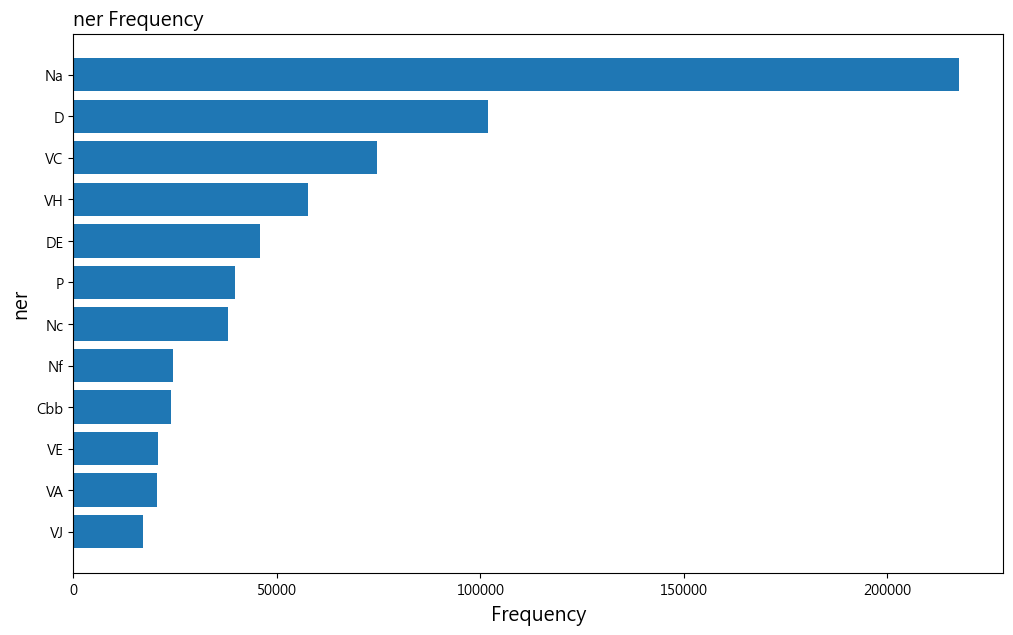

In [36]:
pos = pos_count['pos']
count = pos_count['count']

fig, ax = plt.subplots(figsize =(12, 7))
ax.barh(pos, count)
ax.invert_yaxis()
ax.set_title('ner Frequency',loc ='left', size = 14)
ax.set_ylabel('ner', size = 14)
ax.set_xlabel('Frequency', size = 14)
fig.show()

### 涉及到的名詞(Noun)
+ 我們可以找出談論電動車時大部分討論到的名詞，探索大家的關注焦點。
+ 名詞可以分為「Na: 普通名詞」、「Nb: 專有名詞」等

In [37]:
# 篩選pos為專有名詞的資料
l_noun = ["Nb"] #,"Na"
noun = pos_table[pos_table.pos.isin(l_noun)]

# 計算每個名詞提到的次數，選出前15個
noun_count = noun[['word']].groupby(['word'])['word'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(15)
noun_count.head(10)

,word,count
1584,特斯拉,3509
2197,豐田,776
2772,鴻海,617
2137,裕隆,560
1746,福斯,493
1761,福特,420
2253,賓士,385
2700,馬斯克,298
1821,納智捷,271
1421,比亞迪,247


C:\Users\meiii\AppData\Local\Temp\ipykernel_328\871709276.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


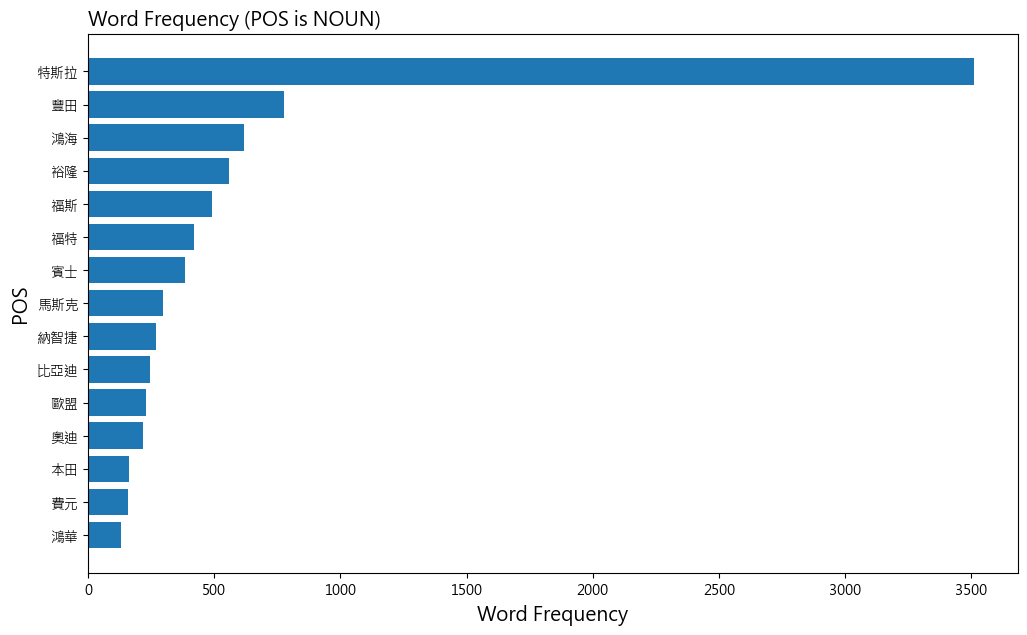

In [38]:
# 設定中文字形
plt.rcParams['font.family'] = 'Microsoft JhengHei'
plt.rcParams['axes.unicode_minus'] = False
word = noun_count['word']
count = noun_count['count']

fig, ax = plt.subplots(figsize =(12, 7))
ax.barh(word, count)
ax.invert_yaxis()
ax.set_title('Word Frequency (POS is NOUN)',loc ='left', size = 14)
ax.set_ylabel('POS', size = 14)
ax.set_xlabel('Word Frequency', size = 14)
fig.show()

可以看到特斯拉依舊是出現最多次的專有名詞，另外，從「豐田」、「鴻海」和「裕隆」等專有名詞可以推測出那些廠牌正在開發電動車。

### 涉及到的動詞(VERB)
+ 我們可以找出談論電動車時大部分討論到的動詞，探索相關行為。
+ VC: 動作及物動詞、VH: 狀態不及物動詞、VA: 動作不及物動詞

In [39]:
l_verb = ["VC"] # ,"VH","VA"
verb = pos_table[pos_table.pos.isin(l_verb)] # 選取特定詞性
verb = verb[verb['word'].map(len) > 1] # 把長度為1的字去除掉

verb_count = verb[['word']].groupby(['word'])['word'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(15)
verb_count

,word,count
4183,連結,1683
164,使用,1573
4638,駕駛,1073
4352,銷售,1031
1894,推出,1023
2934,發展,712
4199,進行,658
4435,開發,624
2868,生產,589
1845,採用,584


C:\Users\meiii\AppData\Local\Temp\ipykernel_328\1501830057.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


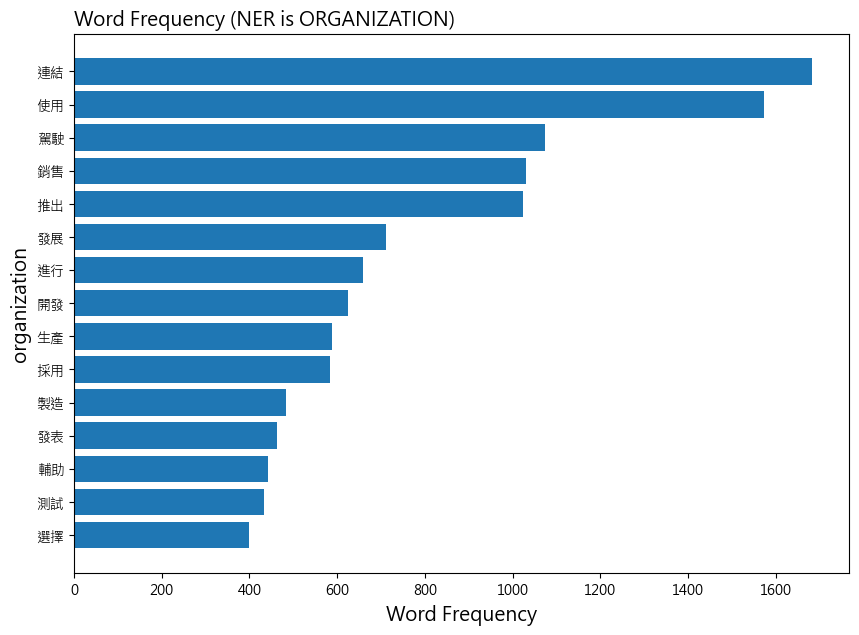

In [40]:
plt.rcParams['font.family'] = 'Microsoft JhengHei'
plt.rcParams['axes.unicode_minus'] = False
word = verb_count['word']
count = verb_count['count']

fig, ax = plt.subplots(figsize =(10, 7))
ax.barh(word, count)
ax.invert_yaxis()
ax.set_title('Word Frequency (NER is ORGANIZATION)',loc ='left', size = 14)
ax.set_ylabel('organization', size = 14)
ax.set_xlabel('Word Frequency', size = 14)
fig.show()

發現在貼文中的動詞，「發展」佔了相當高的頻率，其他還有出現「進行」、「開發」等詞彙，可推測電動車還是正在發展中的領域。

## 4. 利用SnowNLP進行情緒分析

+ SnowNLP 針對中文設計，可以提取句子的情緒分類
+ 使用文件分類法，套件已預先用文集訓練模型以判斷情緒
+ 情緒值在 0~1之間，代表負面到正面
+ 官方github: https://github.com/isnowfy/snownlp

In [41]:
from snownlp import SnowNLP

使用先前NER得到的「電動車」相關文章，看看電動車相關文章的情緒表現。<br>
首先將句子和日期合併，方便之後做分析

In [42]:
sentence_table = pd.read_csv("sentence_table_buffet.csv") #匯資料

sentiment_date = pd.merge(sentence_table,shu_selected[['system_id','artDate','dataSource']],on='system_id',how='left').dropna()
sentiment_date.head(3)

,system_id,sentence,artDate,dataSource
0,1,其實大約多年前,2021-03-17 10:57:27,ptt
1,1,就有車廠在研發,2021-03-17 10:57:27,ptt
2,1,酒精燃料車,2021-03-17 10:57:27,ptt


In [43]:
def get_sentiment(sent):
    s = SnowNLP(sent)
    return s.sentiments

# 幫每句話加上情緒分數
sentiment_date['sentimentValue'] = sentiment_date.apply(lambda row : get_sentiment(row['sentence'],), axis = 1)
sentiment_date.head(10)

,system_id,sentence,artDate,dataSource,sentimentValue
0,1,其實大約多年前,2021-03-17 10:57:27,ptt,0.726485
1,1,就有車廠在研發,2021-03-17 10:57:27,ptt,0.982439
2,1,酒精燃料車,2021-03-17 10:57:27,ptt,0.350801
3,1,如果用生質酒精當燃料,2021-03-17 10:57:27,ptt,0.440497
4,1,就是,2021-03-17 10:57:27,ptt,0.526233
5,1,碳排的循環經濟惹,2021-03-17 10:57:27,ptt,0.058367
6,1,拿酒精引擎發電當油電車,2021-03-17 10:57:27,ptt,0.482939
7,1,也可以解決酒精引擎,2021-03-17 10:57:27,ptt,0.474586
8,1,馬力扭力較弱的問題,2021-03-17 10:57:27,ptt,0.011691
9,1,這樣來酒精油電車,2021-03-17 10:57:27,ptt,0.173448


In [44]:
# 看一下情緒的分布
sentiment_date['sentimentValue'].describe()

count    84093.000000
mean         0.409216
std          0.330667
min          0.000000
25%          0.089444
50%          0.356006
75%          0.684960
max          1.000000
Name: sentimentValue, dtype: float64

<Axes: >

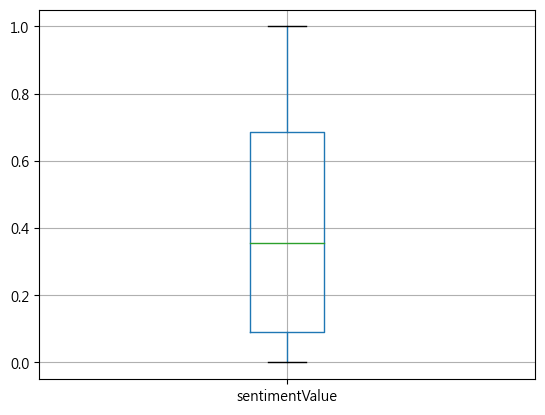

In [45]:
# 情緒分布的盒狀圖
boxplot = sentiment_date.boxplot(column=['sentimentValue'], showfliers=False)
boxplot

將每個月的情緒分數取平均，並轉換時間格式為年月

In [46]:
sent_date = sentiment_date.copy()
sent_date['artDate'] =  pd.to_datetime(sentiment_date['artDate']).dt.to_period('M')

sentiment_count = sent_date.groupby(['artDate'])['sentimentValue'].mean().reset_index()
sentiment_count

,artDate,sentimentValue
0,2021-03,0.434968
1,2021-04,0.415151
2,2021-05,0.395272
3,2021-06,0.408830
4,2021-07,0.420258
5,2021-08,0.419154
6,2021-09,0.402925
7,2021-10,0.406422
8,2021-11,0.422269
9,2021-12,0.394314


C:\Users\meiii\AppData\Local\Temp\ipykernel_328\857956447.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


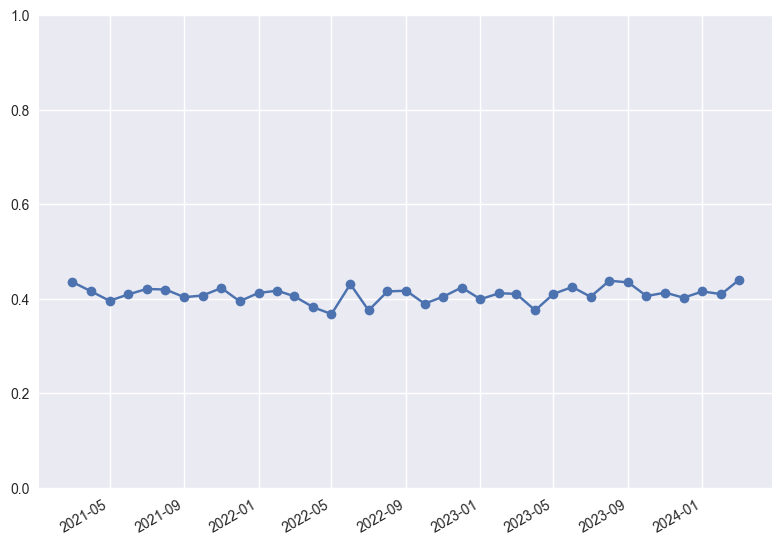

In [47]:
# 平均情緒分數時間趨勢
months = [period.to_timestamp() for period in sentiment_count['artDate']]   # 將 PeriodIndex 中的每個 Period 物件轉換為對應的 datetime 物件
y = sentiment_count['sentimentValue']

plt.style.use('seaborn')

plt.plot_date(months, y, linestyle='solid')
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.ylim(0, 1)

plt.show()

從上圖中發現大部分天數的情緒值都在0.3~0.5之間，偏向負向，推測是因為電池續航率與充電問題。我們挑出 2023年09月 來分析。

### 詞彙探索
從上圖中可以發現 2023年09月 的情緒分數相對高，我們把這個月的正面句子挑出來看看他們都用甚麼詞。<br>
在2023年09月，美國致力於在建立充電樁，剛好電動車充電問題一直以來都是使用者看中的重點，因此引起正向討論。

In [49]:
# 篩時間
filter_sentiment = sent_date[sent_date['artDate']=='2023-09']
filter_sentiment = filter_sentiment.loc[filter_sentiment['sentimentValue'] > 0.7]

filter_sentiment.head()

,system_id,sentence,artDate,dataSource,sentimentValue
66238,2277,美國致力建立美國製造的電動車充電樁網路,2023-09,ptt,0.999965
66241,2277,美國總統拜登透過其投資美國之宣言，以美國製造的,2023-09,ptt,0.999790
66244,2277,業並應對氣候危機，美國必須在高速公路沿路建立個方便可靠且美國製造的電動車,2023-09,ptt,0.870149
66246,2277,關於美國電動車的充電基礎設施需求，根據美國國家可再生能源實驗室,2023-09,ptt,0.997429
66247,2277,，年月發布的年國家充電網路研究報告,2023-09,ptt,0.979231


In [50]:
# 把時間分數和之前斷詞的 token table 做 join
pos_words = pd.merge(filter_sentiment,pos_table,on='system_id',how='left')
pos_words = pos_words[['system_id','sentimentValue','word']]
pos_words.head()

,system_id,sentimentValue,word
0,2277,0.999965,美國
1,2277,0.999965,致力
2,2277,0.999965,建立
3,2277,0.999965,美國
4,2277,0.999965,製造


In [51]:
# 篩選掉只有單個字元的結果
pos_words = pos_words[pos_words.apply(lambda x: len(x['word'])>1, axis=1)]

### 正面詞彙文字雲

In [52]:
# 自定停用字
with open('stopwords.txt',encoding='utf-8') as f:
    stop_words = f.read().splitlines()

print(stop_words)

['99$', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '?', '_', '“', '”', '、', '。', '《', '》', '一', '電動車', '汽車', '原文', '一下', '現在', '一台', '目前', '看到', '連結', '知道', '部分', '感覺', '需要', '內容', '表示', '推出', '', '使用', '不用', '未來', '銷售', '提供', '直接', '今年', '完全', '考慮', '發展', '一直', '電動', '這種', '進行', '全新', '希望', '主要', '控制', '重要', '朋友', '', '一些', '一何', '一切', '一則', '一方面', '一旦', '一來', '一樣', '一般', '一轉眼', '萬一', '上', '上下', '下', '不', '不僅', '不但', '不光', '不單', '不只', '不外乎', '不如', '不妨', '不盡', '不盡然', '不得', '不怕', '不惟', '不成', '不拘', '不料', '不是', '不比', '不然', '不特', '不獨', '不管', '不至於', '不若', '不論', '不過', '不問', '與', '與其', '與其說', '與否', '與此同時', '且', '且不說', '且說', '兩者', '個', '個別', '臨', '為', '為了', '為什麼', '為何', '為止', '為此', '為著', '乃', '乃至', '乃至於', '麼', '之', '之一', '之所以', '之類', '烏乎', '乎', '乘', '也', '也好', '也罷', '了', '二來', '於', '於是', '於是乎', '云云', '云爾', '些', '亦', '人', '人們', '人家', '什麼', '什麼樣', '今', '介於', '仍', '仍舊', '從', '從此', '從而', '他', '他人', '他們', '以', '以上', '以為', '以便', '以免', '以及', '以故', '以期', '以來', '以至', '以至於', '以致', '們', '任', '任何',

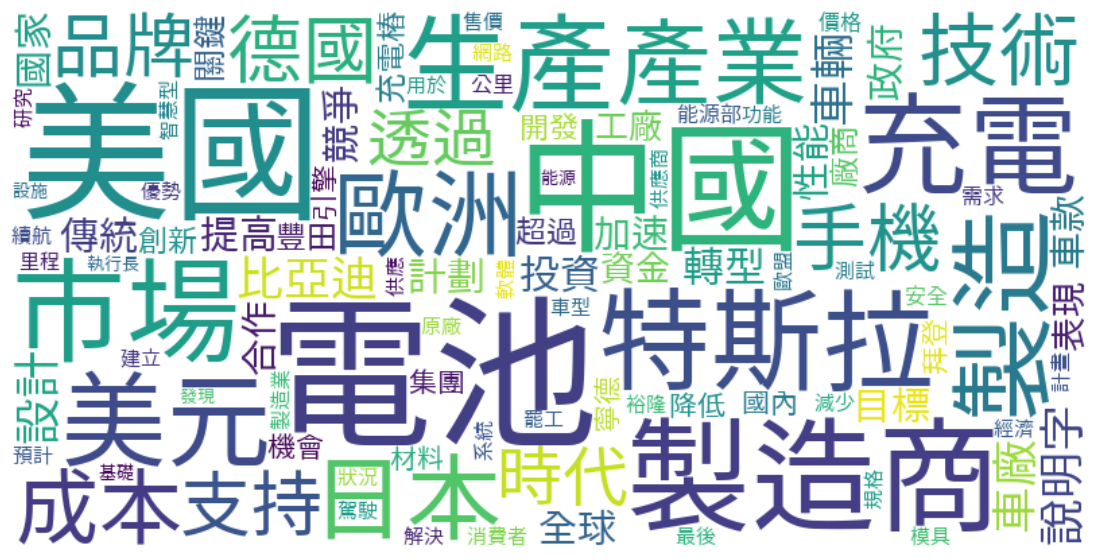

In [53]:
# 匯入自訂的 stop words (預設只有英文的)
stop_words_pos = stop_words
stop_words_pos.extend(('取得','公布','改變','心得','公司','進入','更多','正在','過程','方式','新聞','採用','不斷','成為','中心','影響','面臨','擁有','之外','尤其','帶來','時間','營業','覺得','真的','台灣','台北','高雄','有點','完全','最多','相當','不錯','部分','最多','提供'))
stop_words_pos = set(stop_words_pos)

# 設定中文字形
font_path = 'TaipeiSansTCBeta-Regular.ttf'

# 可以設定字型大小和背景顏色
wordcloud = WordCloud(
                stopwords=stop_words_pos,
                collocations=False,
                font_path=font_path,
                width=800, 
                height = 400, 
                max_words=100, 
                background_color="white")

wordcloud.generate(' '.join(pos_words['word']))
# Display the generated image:
plt.figure(figsize = (14,7))
plt.imshow(wordcloud, interpolation="bilinear")

plt.axis("off")
plt.show()

藉由各式電動車以及「國家」、「電池」、「廠商」等詞彙出現在正向文章中，可以知道在電動車廠牌競爭中，國家常常被拿來比較，例如中國的比亞迪常常被拿來和其他國家的產品做比較，也可以看出電動車的製造國家主要分布在中國美國歐洲；除此之外，「電池性能」、「關稅」也是常被討論的話題。